<class 'list'>
(6, 5)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 3)                 18        
_________________________________________________________________
new (Dense)                  (None, 1)                 4         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
Train on 4 samples, validate on 2 samples
Epoch 1/100
4/4 [==============================] - 2s 424ms/sample - loss: 50.3183 - acc: 0.0000e+00 - val_loss: 103.9146 - val_acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 10ms/sample - loss: 49.7273 - acc: 0.0000e+00 - val_loss: 103.1479 - val_acc: 0.0000e+00
Epoch 3/100
4/4 [====================

4/4 [==============================] - 0s 9ms/sample - loss: 8.0189 - acc: 0.0000e+00 - val_loss: 30.1102 - val_acc: 0.0000e+00
Epoch 54/100
4/4 [==============================] - 0s 8ms/sample - loss: 7.3986 - acc: 0.0000e+00 - val_loss: 28.6813 - val_acc: 0.0000e+00
Epoch 55/100
4/4 [==============================] - 0s 8ms/sample - loss: 6.8423 - acc: 0.0000e+00 - val_loss: 27.3230 - val_acc: 0.0000e+00
Epoch 56/100
4/4 [==============================] - 0s 9ms/sample - loss: 6.2205 - acc: 0.0000e+00 - val_loss: 26.1234 - val_acc: 0.0000e+00
Epoch 57/100
4/4 [==============================] - 0s 9ms/sample - loss: 5.7701 - acc: 0.0000e+00 - val_loss: 24.9545 - val_acc: 0.0000e+00
Epoch 58/100
4/4 [==============================] - 0s 8ms/sample - loss: 5.3060 - acc: 0.0000e+00 - val_loss: 23.8642 - val_acc: 0.0000e+00
Epoch 59/100
4/4 [==============================] - 0s 8ms/sample - loss: 4.8908 - acc: 0.0000e+00 - val_loss: 22.8345 - val_acc: 0.0000e+00
Epoch 60/100
4/4 [========

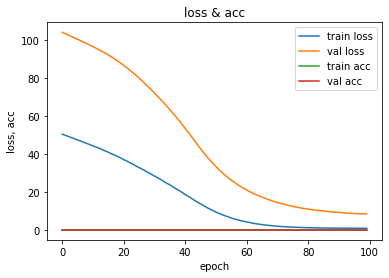

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM

# Data
a = np.array(range(1,11))
size = 5                                         

def split_x(seq, size):
    aaa = []
    for i in range(len(seq) - size + 1):       # len = length  : 길이  i in range(6)  : [0, 1, 2, 3, 4, 5]
        subset = seq[i : (i + size)]           # i =0,  subset = a[ 0 : 5 ] = [ 1, 2, 3, 4, 5]
        aaa.append([item for item in subset])  # aaa = [[1, 2, 3, 4, 5]]
        # aaa.append(subset)
    print(type(aaa))
    return np.array(aaa)

dataset = split_x(a, size)                               
print(dataset.shape)                           # (6, 5)


# x, y split
x = dataset[:, 0:4]                            # [ : ] 모든행 가져오고, [0 : 4] 0~3까지
y = dataset[:, 4]                              # [ : ] 모든행 가져오고, [  : 4] 4번째

x = x.reshape(x.shape[0], x.shape[1], 1)       # (6, 5, 1)

# model
model = Sequential()
model.add(LSTM(5, input_shape =(4,1)))
model.add(Dense(3))   
model.add(Dense(1, name ='new'))                 

model.summary()


# EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping        
es = EarlyStopping(monitor = 'loss', patience=100, mode = 'min')


# Tensorboard
from tensorflow.keras.callbacks import TensorBoard                                 # Tensorboard 가져오기
tb_hist = TensorBoard(log_dir='graph', histogram_freq= 0 , # log_dir=' 폴더 ' : 제일 많이 틀림
                      write_graph= True, write_images= True)           
"""
: 웹 상에서 graph를 볼 수 있게 만들어줌( log_dir=' 폴더 '에 tensorboard의 로그 저장 )
: loss와 metrics 값 보여줌
 # anaconda cmd 창에서 
 1. 코드가 저장되어있는 폴더로 이동     # cd명령어를 이용
 2. cd Study                            # 경로가 제일 많이 틀린다.
 3. cd graph
 4. tensorboard --logdir=./폴더/        # 내 컴퓨터에서 tensorboard를 쓰겠다.
 =>  http://localhost:6006 를 웹주소에 친다.
     6006      : 포트 번호    -> 내 pc의 6006번 포트를 사용하겠다.
"""
 
# Training
model.compile(loss = 'mse', optimizer='adam', metrics= ['acc'])
hist = model.fit(x, y, epochs =100, batch_size = 1, verbose =1,   
                 validation_split = 0.2,
                 callbacks = [es, tb_hist]) # Tensorboard 사용


# plot graph
import matplotlib.pyplot as plt                     # 그래프 그리는 것

plt.plot(hist.history['loss'])                      # 'loss'값을 y로 넣겠다./ 인자 하나만 쓰면 y 값으로 들어감
plt.plot(hist.history['val_loss'])                  # 시간에 따른 loss, acc여서 x 값으로는 자연스럽게 epoch가 들어감
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('loss & acc')
plt.ylabel('loss, acc')
plt.xlabel('epoch')
plt.legend(['train loss','val loss','train acc','val acc'])    # 선에 대한 색깔과 설명이 나옴
# plt.show()                                                     # 그래프 보여주기
